In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("synthetic_breast_cancer.csv")

# Display the shape and first few rows
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (569, 32)
       id  diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  100000          0   0.496714  -0.138264   0.647689   1.523030  -0.234153   
1  100001          1  -0.601707   1.852278  -0.013497  -1.057711   0.822545   
2  100002          0  -0.479174  -0.185659  -1.106335  -1.196207   0.812526   
3  100003          1   0.097078   0.968645  -0.702053  -0.327662  -0.392108   
4  100004          0   0.791032  -0.909387   1.402794  -1.401851   0.586857   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0  -0.234137   1.579213   0.767435  ...    1.465649   -0.225776    0.067528   
1  -1.220844   0.208864  -1.959670  ...    0.324084   -0.385082   -0.676922   
2   1.356240  -0.072010   1.003533  ...   -0.219672    0.357113    1.477894   
3  -1.463515   0.296120   0.261055  ...   -1.918771   -0.026514    0.060230   
4   2.190456  -0.990536  -0.566298  ...    0.227460    1.307143   -1.607483   

   feature_24  feature_25

In [2]:
# Check data types and missing values
print("\
Data types and non-null counts:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print('Number of duplicates:', duplicates)

# Check data types
data_types = df.dtypes
print(data_types)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          569 non-null    int64  
 1   diagnosis   569 non-null    int64  
 2   feature_1   569 non-null    float64
 3   feature_2   569 non-null    float64
 4   feature_3   569 non-null    float64
 5   feature_4   569 non-null    float64
 6   feature_5   569 non-null    float64
 7   feature_6   569 non-null    float64
 8   feature_7   569 non-null    float64
 9   feature_8   569 non-null    float64
 10  feature_9   569 non-null    float64
 11  feature_10  569 non-null    float64
 12  feature_11  569 non-null    float64
 13  feature_12  569 non-null    float64
 14  feature_13  569 non-null    float64
 15  feature_14  569 non-null    float64
 16  feature_15  569 non-null    float64
 17  feature_16  569 non-null    float64
 18  feature_17  569 non-null    float64
 1

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
df = pd.read_csv("synthetic_breast_cancer.csv")

# Encode the categorical variable 'diagnosis'
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['id', 'diagnosis']))

# Create a new DataFrame with scaled features and the encoded diagnosis
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[2:])
scaled_df['diagnosis'] = df['diagnosis']

# Display the head of the scaled DataFrame
print(scaled_df.head())
# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[2:])
scaled_df['diagnosis'] = df['diagnosis']
# Check for outliers in the scaled numerical features
outliers = scaled_df.drop(columns=['diagnosis']).apply(detect_outliers_iqr)

# Count the number of outliers in each feature
outlier_counts = outliers.sum()
print(outlier_counts)

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.485966  -0.152239   0.707240   1.546699  -0.257586  -0.206452   
1  -0.566843   1.838313  -0.002464  -1.055215   0.790835  -1.153030   
2  -0.449399  -0.199634  -1.175496  -1.194847   0.780894   1.319245   
3   0.102924   0.954676  -0.741547  -0.319176  -0.414304  -1.385831   
4   0.768062  -0.923366   1.517756  -1.402178   0.556993   2.119533   

   feature_7  feature_8  feature_9  feature_10  ...  feature_22  feature_23  \
0   1.520658   0.725969  -0.427453    0.547652  ...   -0.234926    0.147345   
1   0.146831  -1.982894  -1.309329    0.184954  ...   -0.397433   -0.573983   
2  -0.134755   0.960488   0.426077   -0.698430  ...    0.359676    1.513905   
3   0.234309   0.222977   0.059937   -0.267711  ...   -0.031659    0.140274   
4  -1.055612  -0.598842   0.157025   -0.549821  ...    1.328795   -1.475640   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0   -1.398330   -0.58

In [4]:
 #Remove outliers based on the IQR method
for column in scaled_df.columns[:-1]:
    Q1 = scaled_df[column].quantile(0.25)
    Q3 = scaled_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    scaled_df = scaled_df[(scaled_df[column] >= lower_bound) & (scaled_df[column] <= upper_bound)]

# Display the shape of the cleaned DataFrame
cleaned_shape = scaled_df.shape
print('Shape of cleaned DataFrame:',cleaned_shape)

Shape of cleaned DataFrame: (430, 31)


In [5]:
                 #VISUALIZATIONS AND KEY EDA INSIGHTS 
df = pd.read_csv("synthetic_breast_cancer.csv")
# Summary statistics
print("\
Summary statistics:")
print(df.describe())

Summary statistics:
                  id   diagnosis   feature_1   feature_2   feature_3  \
count     569.000000  569.000000  569.000000  569.000000  569.000000   
mean   100284.000000    0.395431   -0.010306    0.013974   -0.011201   
std       164.400426    0.489373    1.044243    1.000875    0.932455   
min    100000.000000    0.000000   -3.221016   -3.329504   -2.906988   
25%    100142.000000    0.000000   -0.719472   -0.641727   -0.631241   
50%    100284.000000    0.000000    0.012499    0.011880   -0.013497   
75%    100426.000000    1.000000    0.708214    0.645183    0.591091   
max    100568.000000    1.000000    2.497415    2.985259    3.140423   

        feature_4   feature_5   feature_6   feature_7   feature_8  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean    -0.011083    0.025467   -0.018933    0.062404    0.036577  ...   
std      0.992735    1.008781    1.043311    0.998347    1.007620  ...   
min     -2.966753   -2.929449   -2.

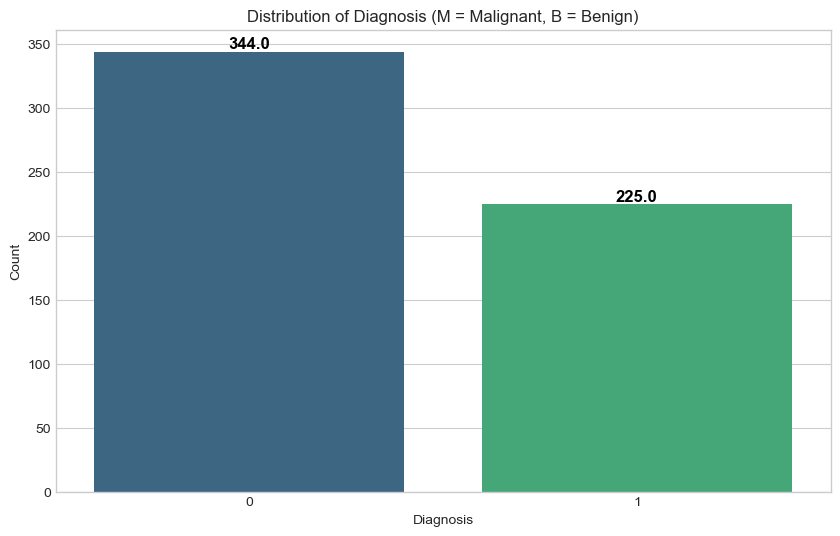

Diagnosis distribution:
diagnosis
0    344
1    225
Name: count, dtype: int64

Percentage:
diagnosis
0    60.456942
1    39.543058
Name: count, dtype: float64


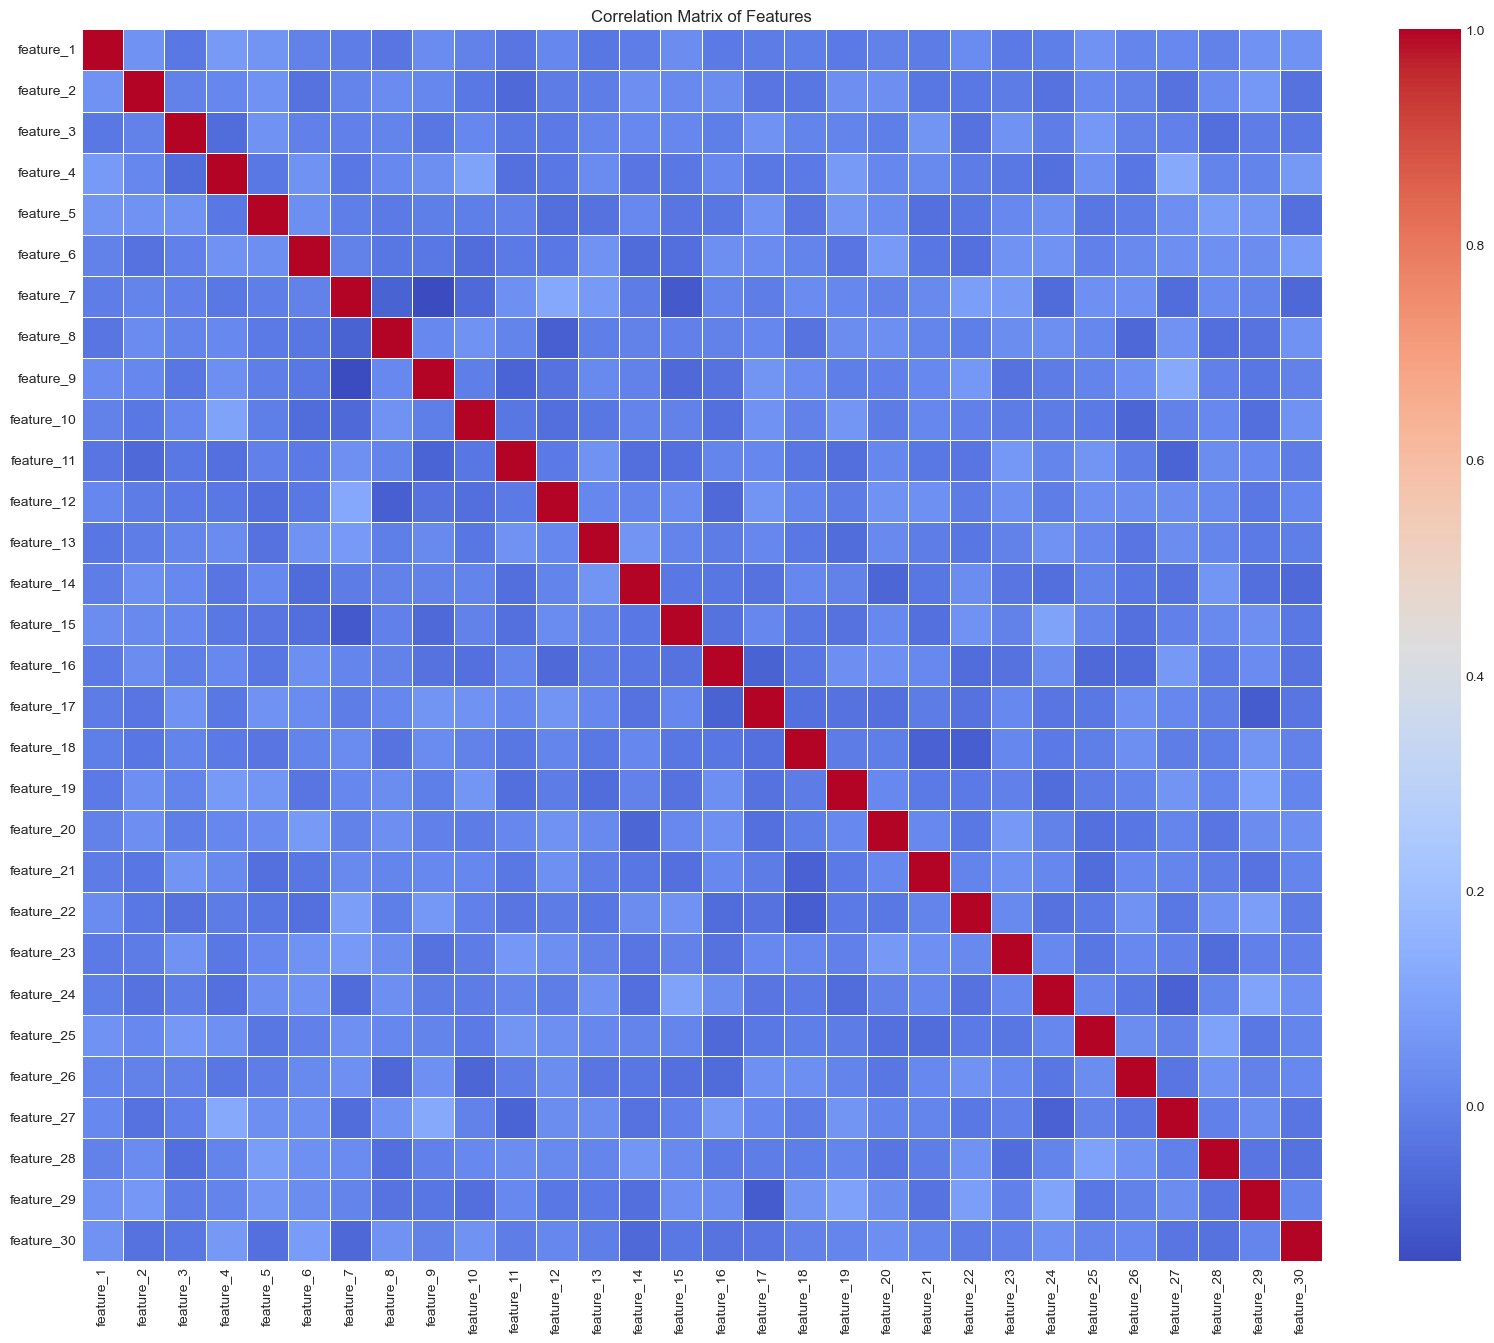

Correlation matrix created. Highly correlated features can be observed in the heatmap.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Count plot for diagnosis with hue set explicitly
ax = sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='viridis', legend=False)
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

# Calculate the percentage of each class
diagnosis_counts = df['diagnosis'].value_counts()
print("Diagnosis distribution:")
print(diagnosis_counts)
print("\nPercentage:")
print(diagnosis_counts / len(df) * 100)

# Create a correlation matrix for the numerical features
# First, drop the non-numerical columns
df_numeric = df.drop(['id', 'diagnosis'], axis=1)

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

print("Correlation matrix created. Highly correlated features can be observed in the heatmap.")

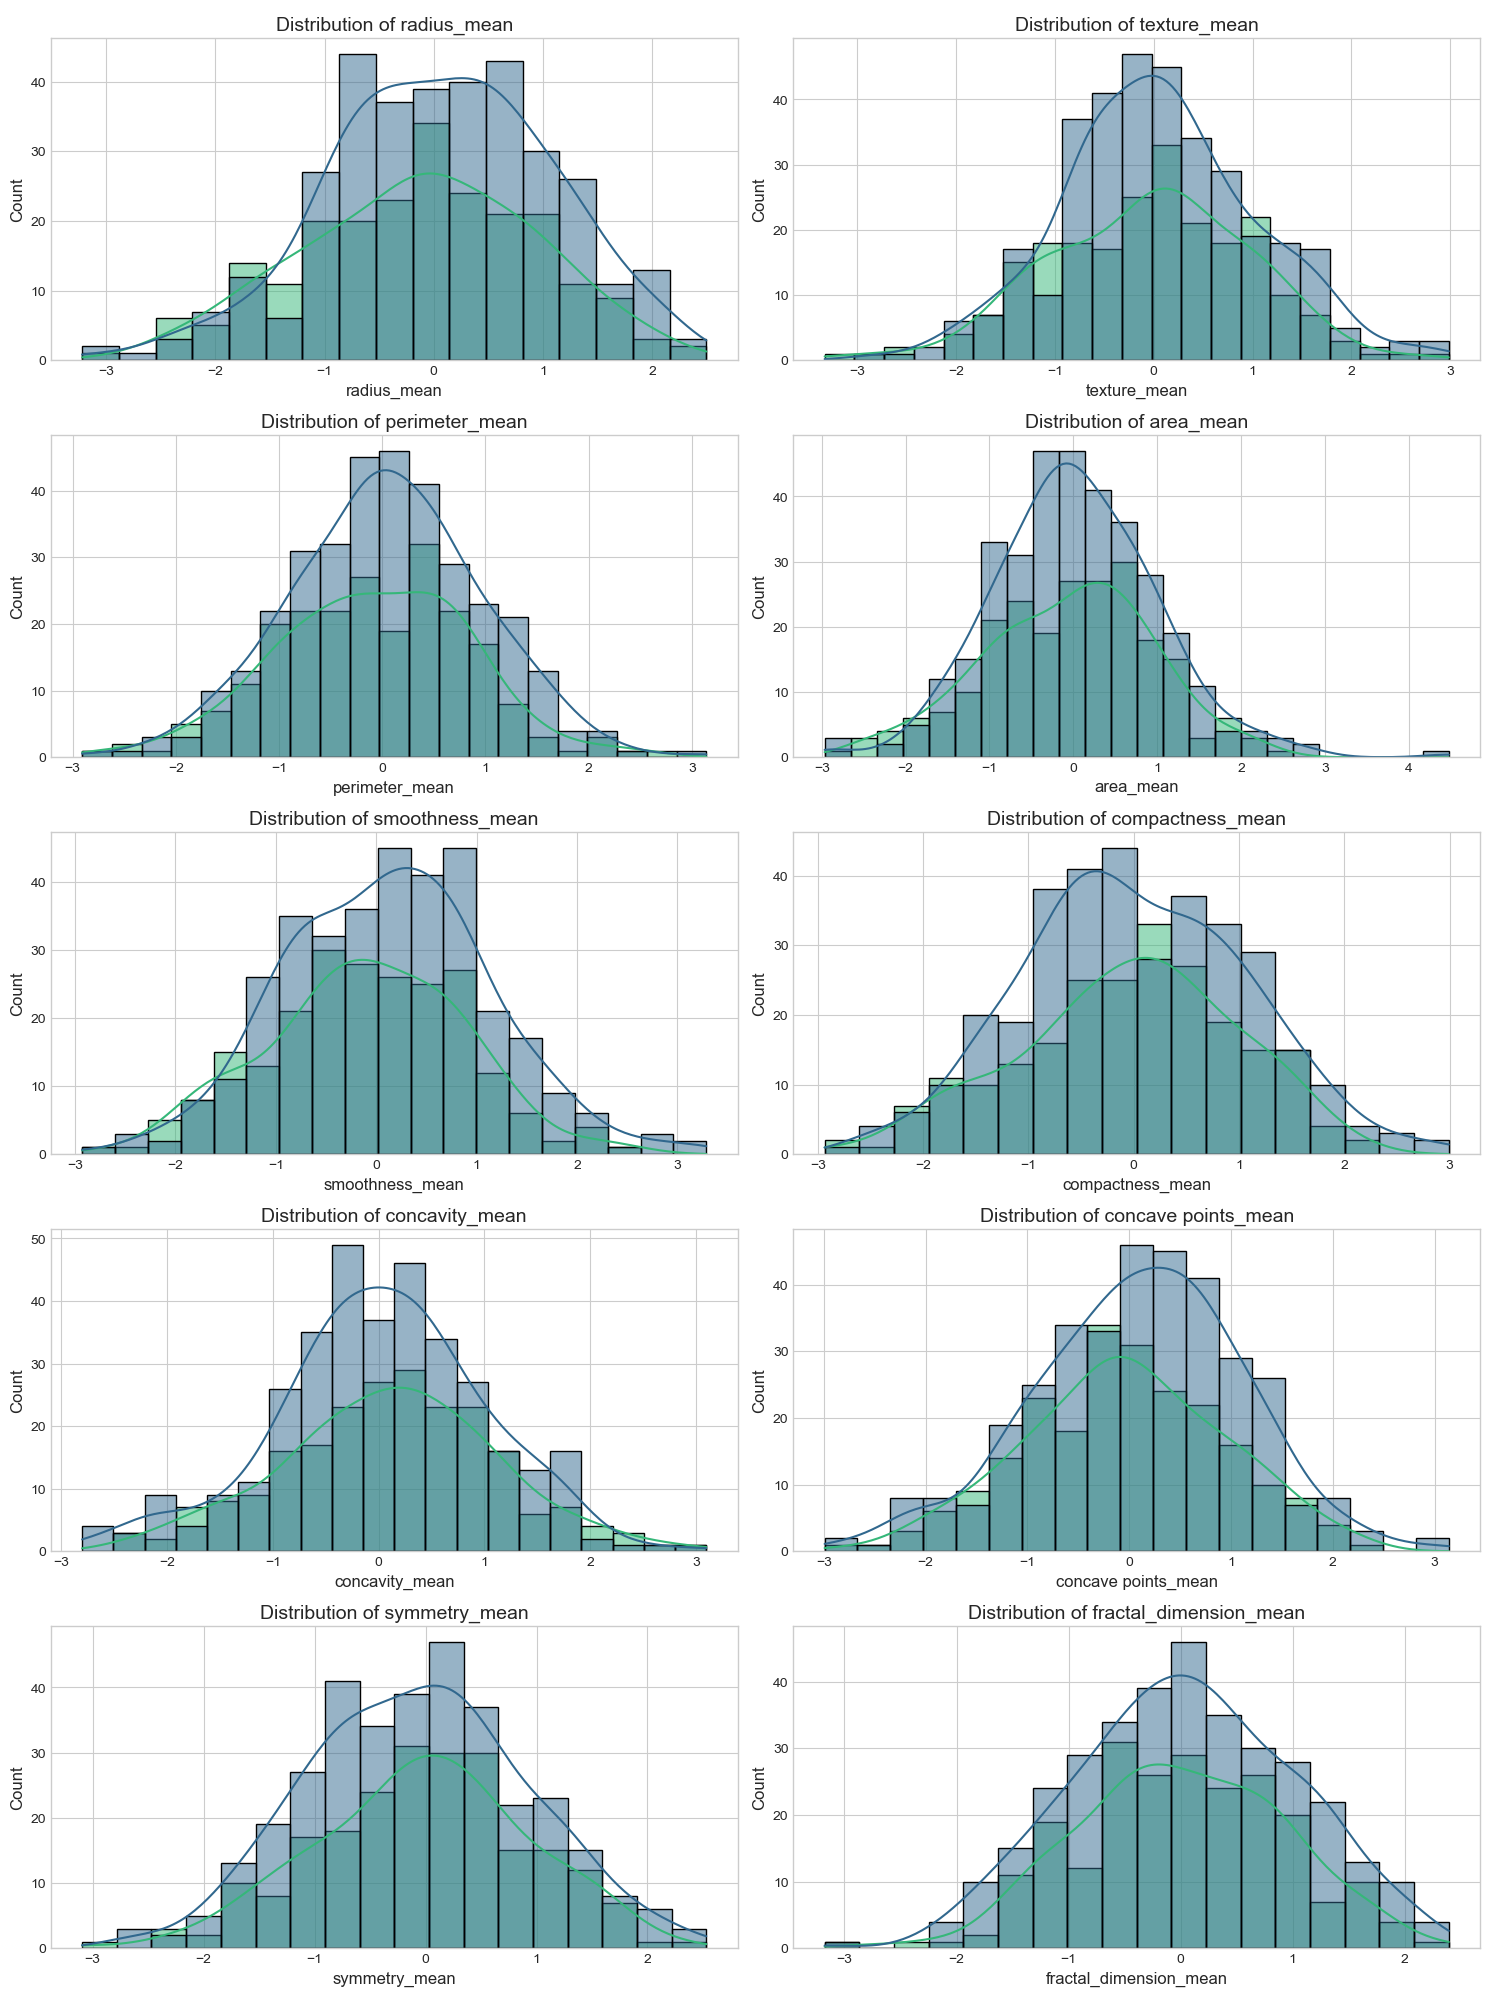

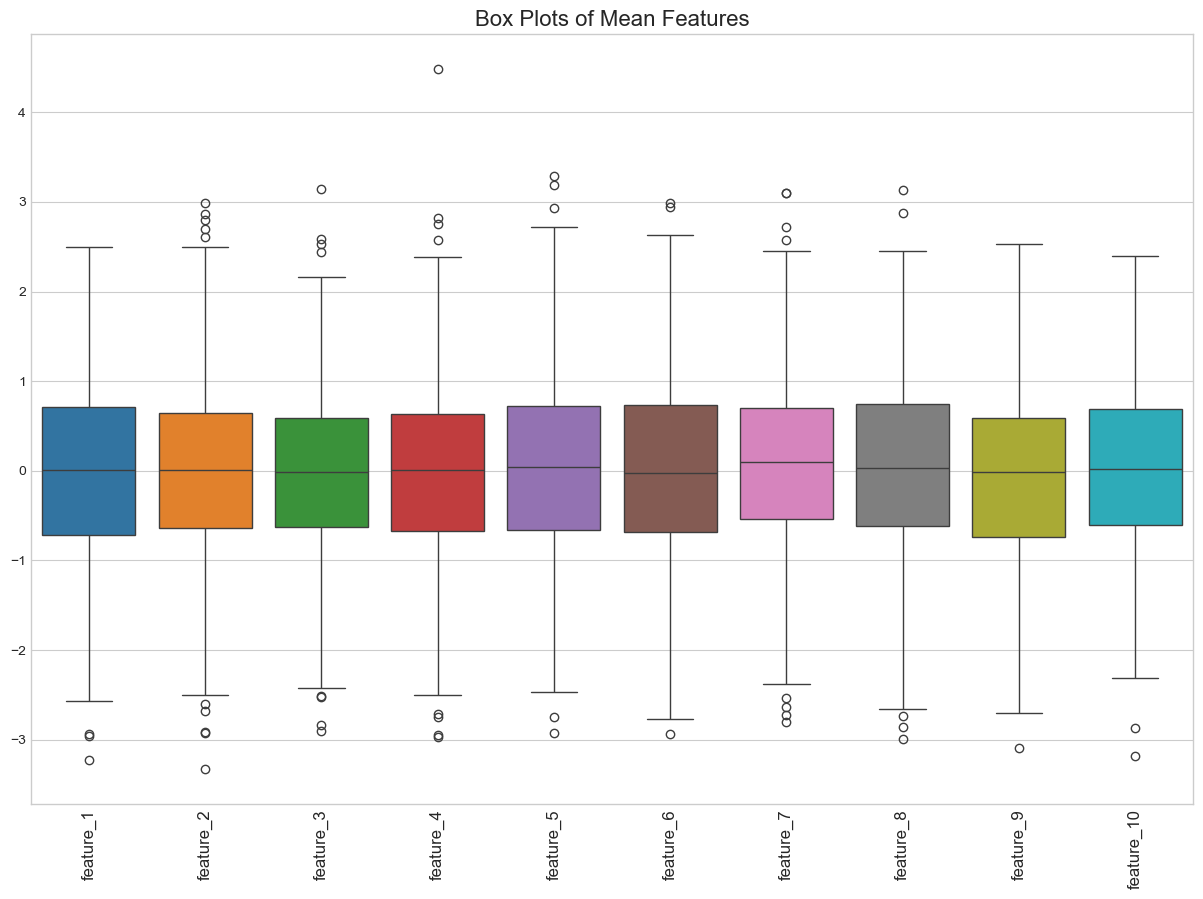

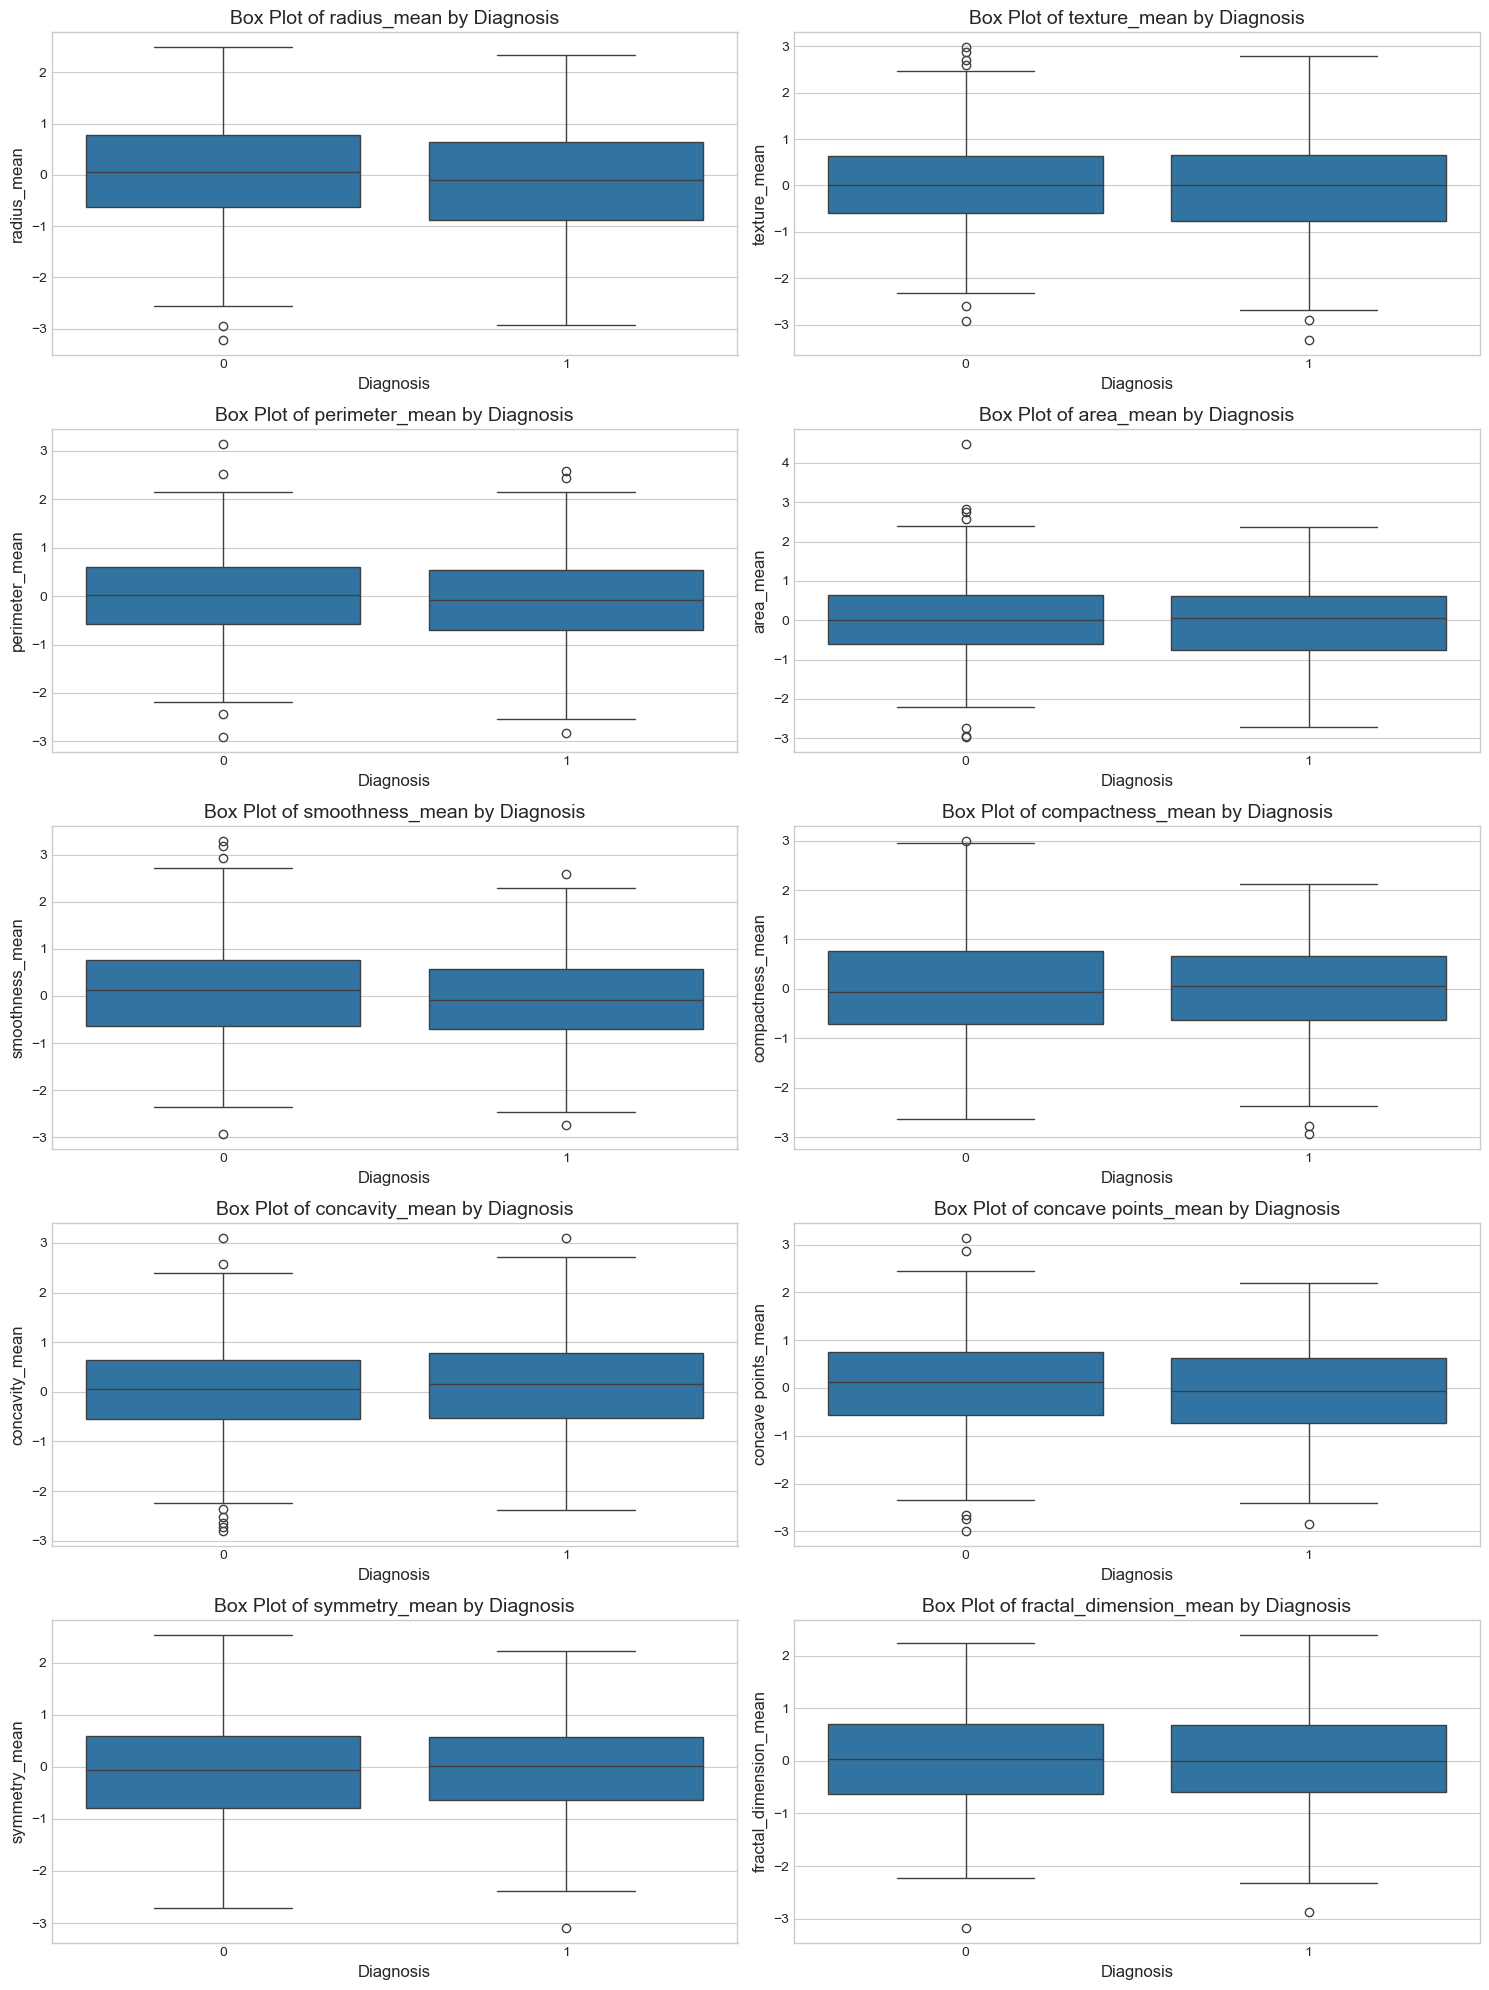

✅ Histograms and box plots created successfully!


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Ensure 'diagnosis' is categorical
df['diagnosis'] = df['diagnosis'].astype('category')

# Define the mean features for analysis
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

### 1️⃣ HISTOGRAMS (Feature Distributions by Diagnosis) ###
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    # Map mean_features to the correct column names in your DataFrame
    feature_col = f'feature_{i+1}'
    sns.histplot(data=df, x=feature_col, hue='diagnosis', hue_order=[0, 1], kde=True,
                 ax=axes[i], hue_norm=None, legend=False, palette='viridis')
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Add a single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Benign (B)', 'Malignant (M)'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

### 2️⃣ BOX PLOTS (Overall Feature Distributions) ###
plt.figure(figsize=(15, 10))
# The original mean_features list does not match the actual DataFrame columns.
sns.boxplot(data=df[[f'feature_{i}' for i in range(1, 11)]])
plt.title('Box Plots of Mean Features', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

### 3️⃣ BOX PLOTS (Feature Distributions by Diagnosis) ###
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    feature_col = f'feature_{i+1}'
    sns.boxplot(data=df, x='diagnosis', y=feature_col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Diagnosis', fontsize=14)
    axes[i].set_xlabel('Diagnosis', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

print("✅ Histograms and box plots created successfully!")

<Figure size 1200x1000 with 0 Axes>

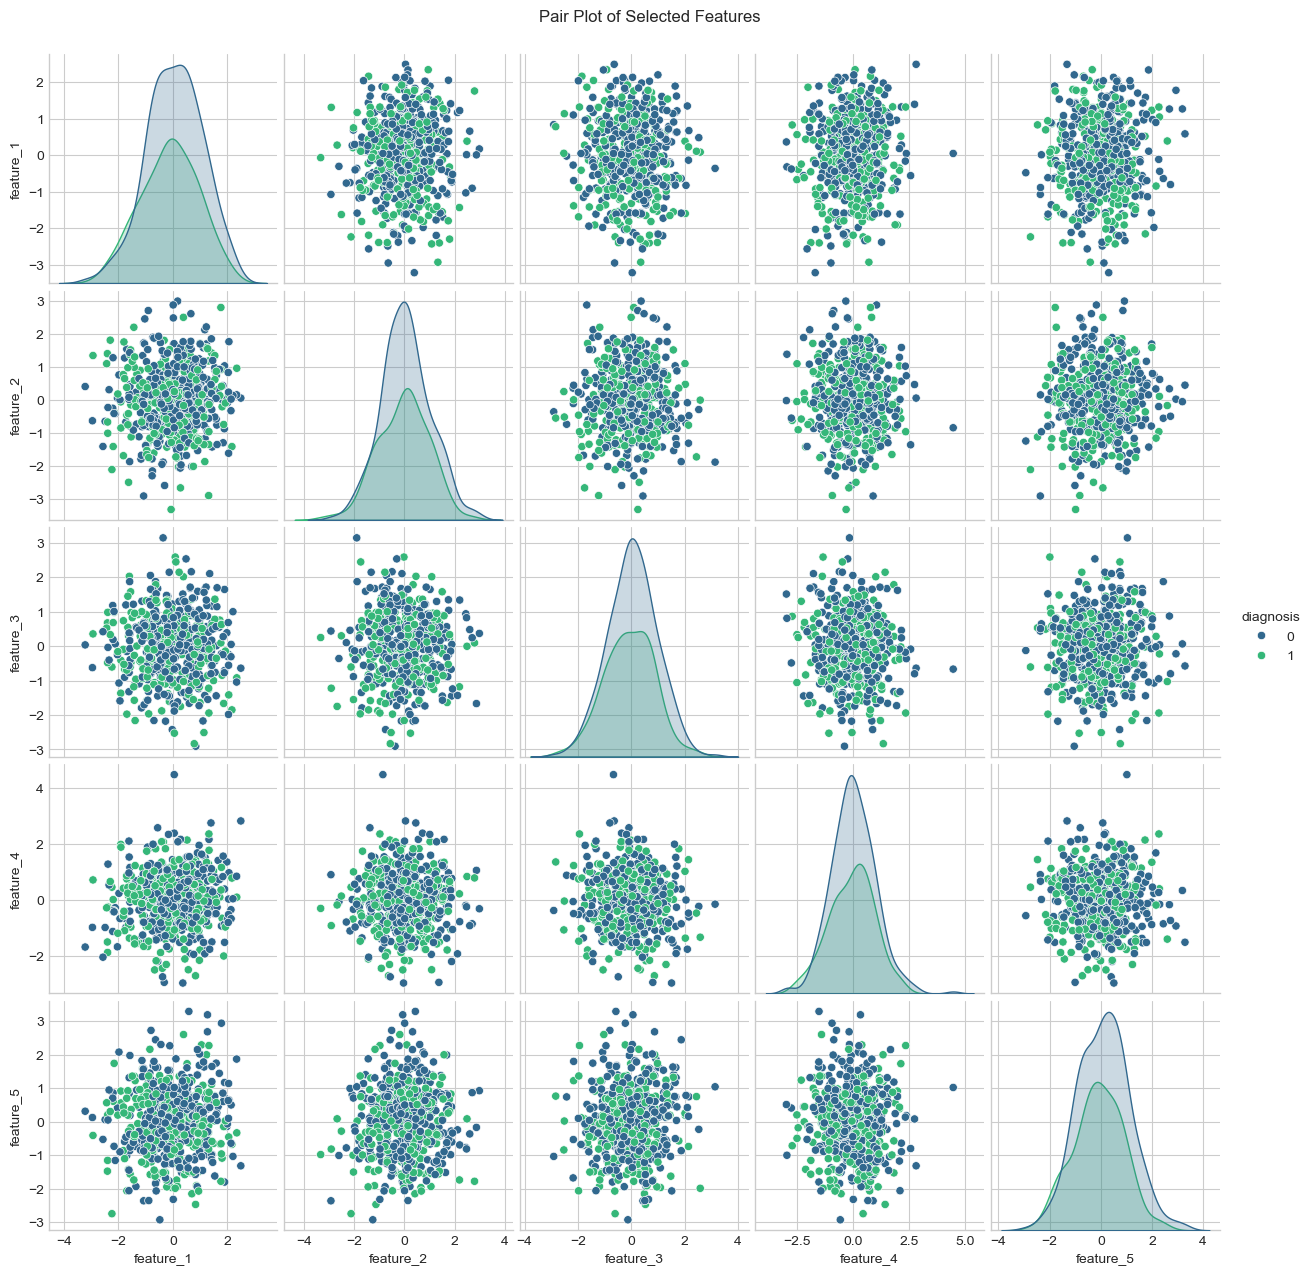

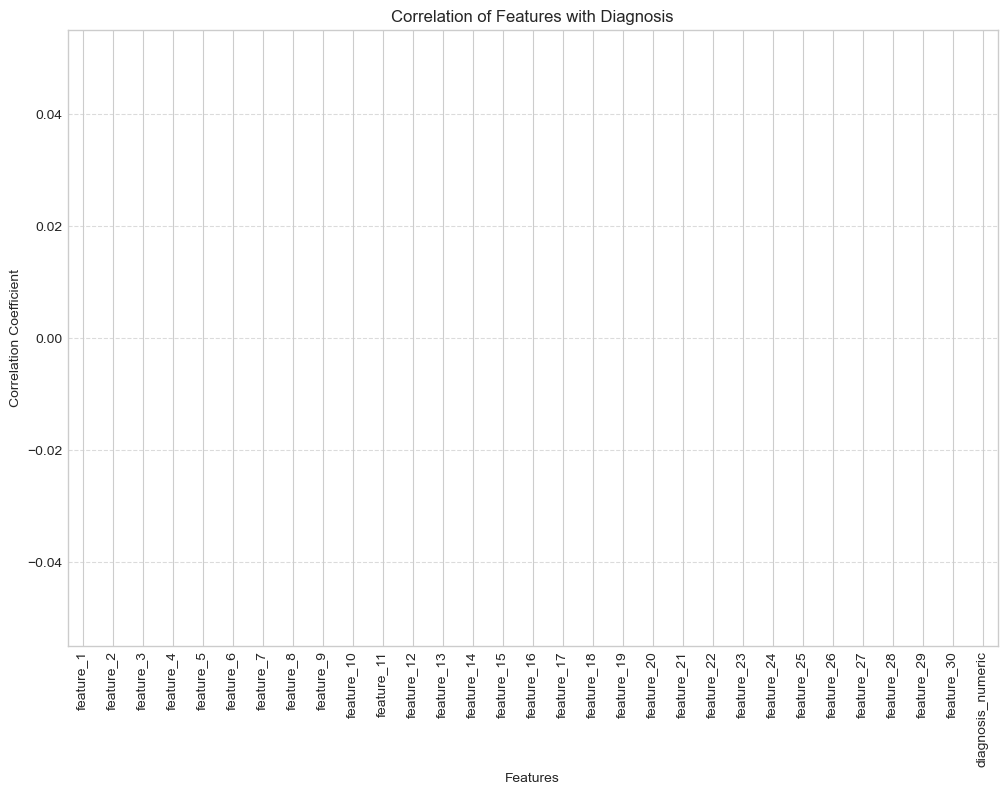

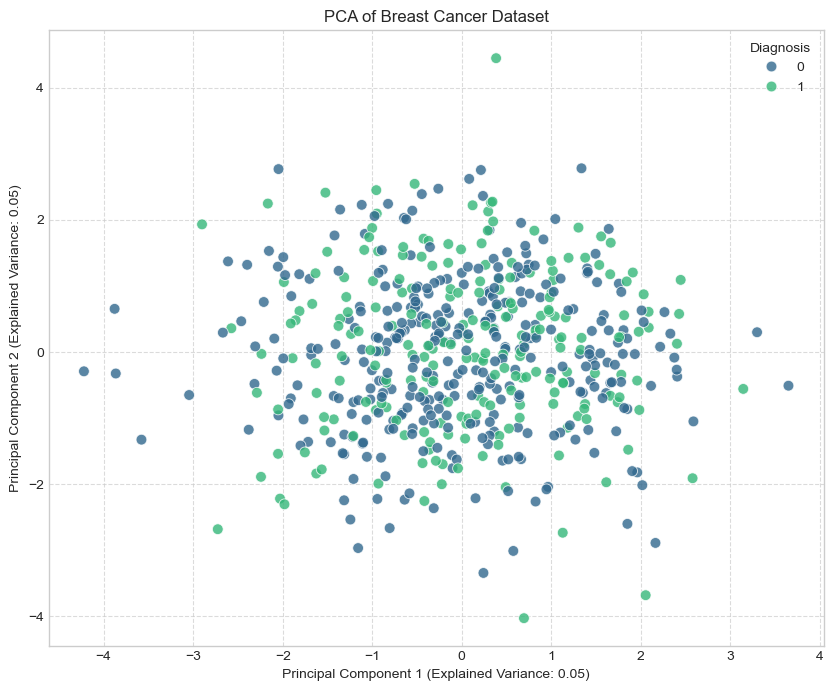


Summary statistics by diagnosis group (first few features):
diagnosis                 0           1
feature_1 count  344.000000  225.000000
          mean     0.066220   -0.127304
          std      1.028144    1.060025
          min     -3.221016   -2.933771
          25%     -0.634743   -0.885963
          50%      0.053863   -0.104449
          75%      0.779256    0.635329
          max      2.497415    2.349109
feature_2 count  344.000000  225.000000
          mean     0.054951   -0.048676
          std      0.987951    1.019343
          min     -2.921350   -3.329504
          25%     -0.587153   -0.762623
          50%      0.010334    0.019617
          75%      0.639010    0.659650
          max      2.985259    2.792209
feature_3 count  344.000000  225.000000
          mean     0.038879   -0.087769
          std      0.925722    0.939560
          min     -2.906988   -2.833030
          25%     -0.575201   -0.696294
          50%      0.031508   -0.076278
          75%      

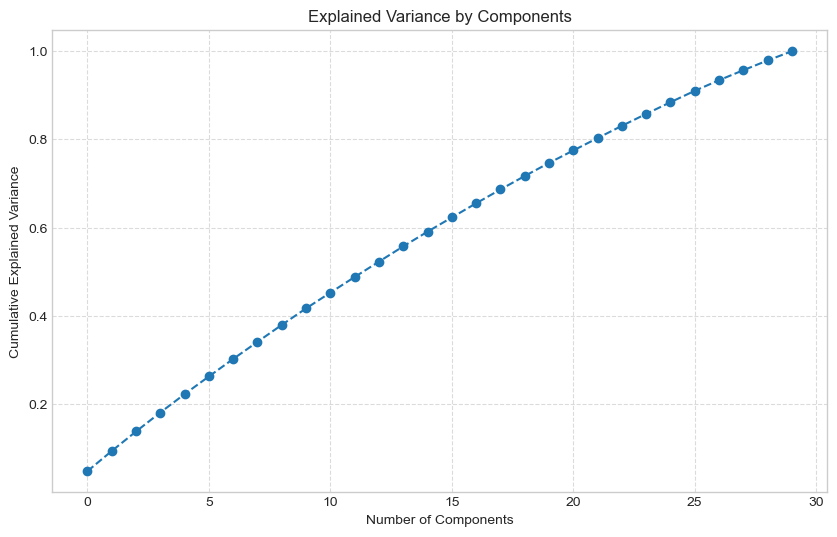

In [8]:
# Let's perform more detailed analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv("synthetic_breast_cancer.csv")

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Pair plot for selected features to visualize relationships
# Select a subset of features to avoid overcrowding
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']
plt.figure(figsize=(12, 10))
# Map selected feature names to their corresponding column names in the DataFrame
selected_feature_cols = [f'feature_{i+1}' for i in range(5)]
sns.pairplot(df[selected_feature_cols + ['diagnosis']], hue='diagnosis', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 2. Calculate and visualize feature importance based on correlation with diagnosis
# First, convert diagnosis to numeric (M=1, B=0)
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Calculate correlation with diagnosis
correlation_with_diagnosis = df.drop(['id', 'diagnosis'], axis=1).corrwith(df['diagnosis_numeric'])
correlation_with_diagnosis = correlation_with_diagnosis.sort_values(ascending=False)

# Plot correlation with diagnosis
plt.figure(figsize=(12, 8))
correlation_with_diagnosis.plot(kind='bar', color='teal')
plt.title('Correlation of Features with Diagnosis')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. PCA to visualize data in 2D
# Standardize the features
X = df.drop(['id', 'diagnosis', 'diagnosis_numeric'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['diagnosis'] = df['diagnosis']

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=principal_df, palette='viridis', s=60, alpha=0.8)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Diagnosis')
plt.show()

# 4. Summary statistics by diagnosis group
summary_by_diagnosis = df.groupby('diagnosis').describe()
print("\nSummary statistics by diagnosis group (first few features):")
# Show the first four features as an example
print(summary_by_diagnosis[[f'feature_{i}' for i in range(1, 5)]].transpose())

# 5. Calculate the variance explained by each principal component
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Index(['id', 'diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30'],
      dtype='object')
Training data shape: (341, 30), Testing data shape: (228, 30)
Accuracy: 0.5877
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       138
           1       0.39      0.08      0.13        90

    accuracy                           0.59       228
   macro avg       0.50      0.50      0.43       228
weighted avg       0.52      0.59      0.49       228



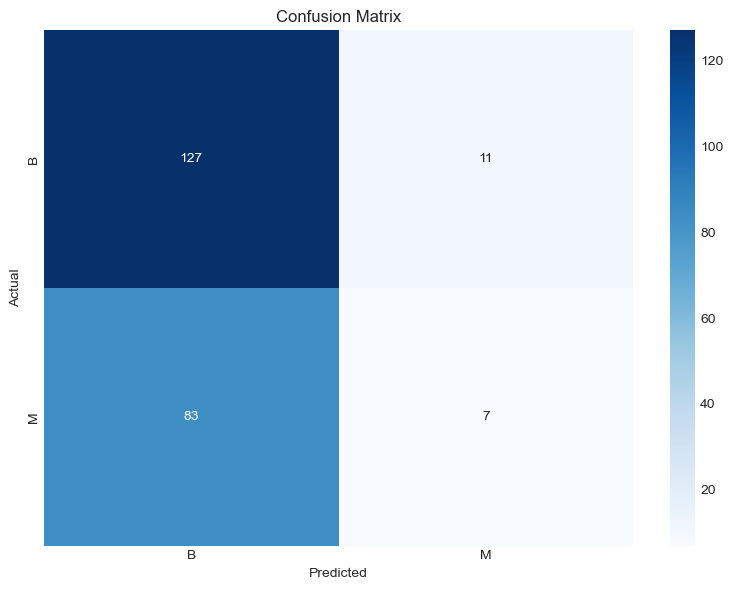

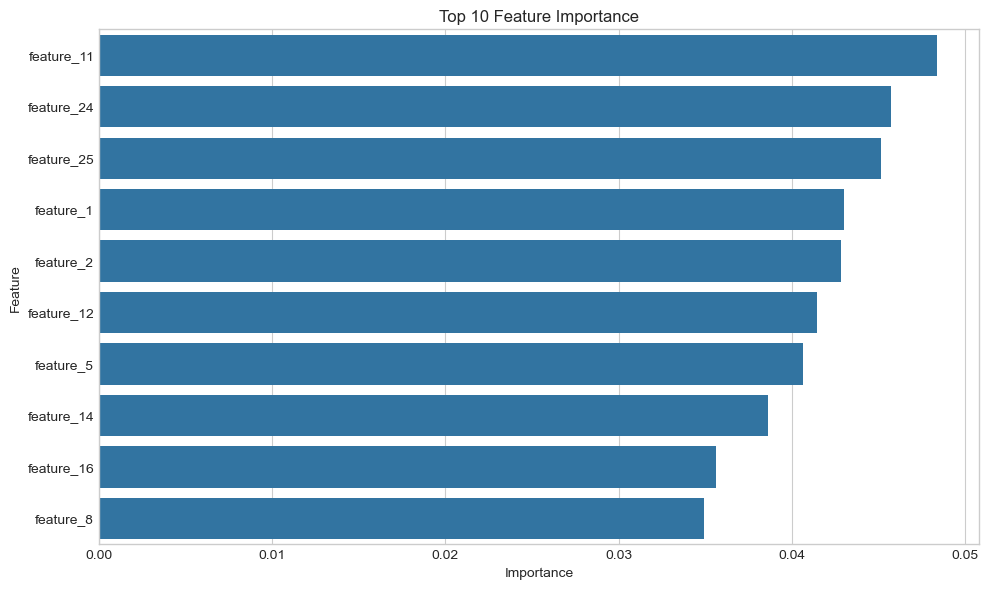

Cross-validation scores: [0.57894737 0.64035088 0.57894737 0.61403509 0.59292035]
Mean CV score: 0.6010
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       138
           1       0.39      0.08      0.13        90

    accuracy                           0.59       228
   macro avg       0.50      0.50      0.43       228
weighted avg       0.52      0.59      0.49       228

Classification completed.
Best Parameters: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 5, 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.63      0.78      0.69       138
           1       0.46      0.29      0.35        90

    accuracy                           0.58       228
   macro avg       0.54      0.53      0.52       228
weighted avg       0.56      0.58      0.56       228



In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("synthetic_breast_cancer.csv")

# Check available columns
print(df.columns)

# Encode the target variable if it doesn't exist
if 'diagnosis_encoded' not in df.columns:
    df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Assuming df is your DataFrame
X = df.drop(['id', 'diagnosis', 'diagnosis_encoded'], axis=1, errors='ignore')
y = df['diagnosis_encoded']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], test_size=0.4, random_state=42, stratify=df['diagnosis'])


print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")



rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_depth=15, random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\
Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['B', 'M'], 
            yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


cv_scores = cross_val_score(rf_model, X, df['diagnosis'], cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Classification completed.")

                                          #HYPER PARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [5, 7, 10, 15],  
    'min_samples_split': [2, 4, 6, 8],  
    'min_samples_leaf': [1, 2, 3, 4],  
    'class_weight': ['balanced', None]  
}

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for faster tuning
grid_search = RandomizedSearchCV(
    rf_model, param_grid, 
    n_iter=15,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Prioritizing recall to catch more malignant cases
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_tuned = best_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

Index(['id', 'diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30'],
      dtype='object')
Training data shape: (341, 30), Testing data shape: (228, 30)
Accuracy: 0.5877
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       138
           1       0.39      0.08      0.13        90

    accuracy                           0.59       228
   macro avg       0.50      0.50      0.43       228
weighted avg       0.52      0.59      0.49       228



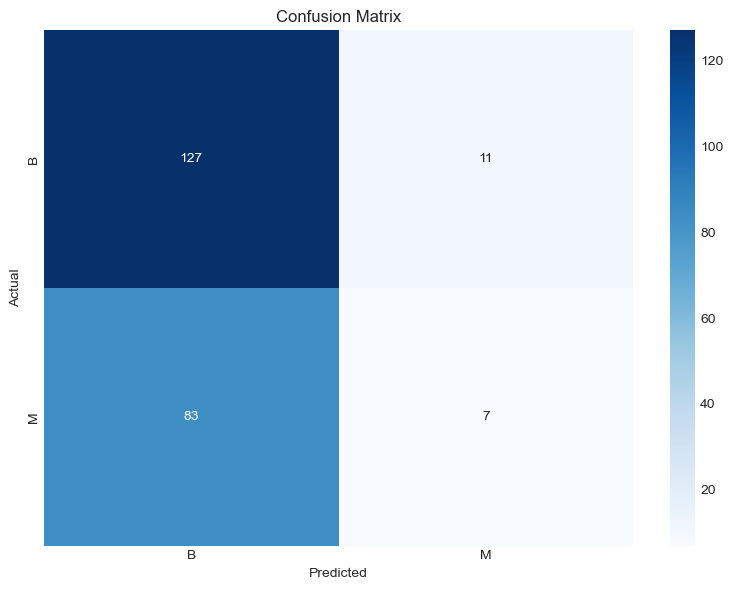

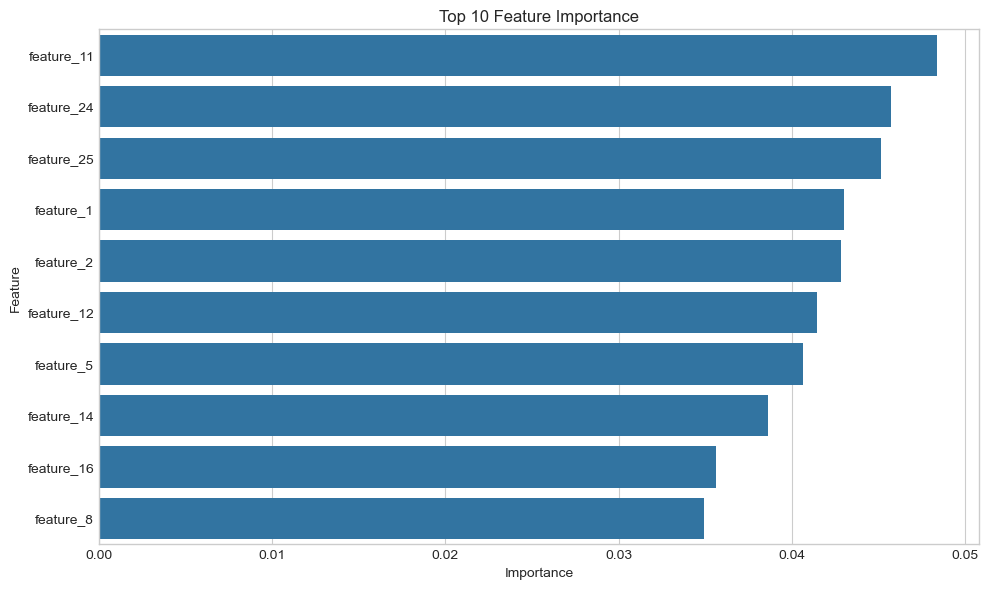

Cross-validation scores: [0.57894737 0.64035088 0.57894737 0.61403509 0.59292035]
Mean CV score: 0.6010
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       138
           1       0.39      0.08      0.13        90

    accuracy                           0.59       228
   macro avg       0.50      0.50      0.43       228
weighted avg       0.52      0.59      0.49       228

Classification completed.
Best Parameters: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 5, 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.63      0.78      0.69       138
           1       0.46      0.29      0.35        90

    accuracy                           0.58       228
   macro avg       0.54      0.53      0.52       228
weighted avg       0.56      0.58      0.56       228



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv(r"synthetic_breast_cancer.csv")

# Check available columns
print(df.columns)

# Encode the target variable if it doesn't exist
if 'diagnosis_encoded' not in df.columns:
    df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Assuming df is your DataFrame
X = df.drop(['id', 'diagnosis', 'diagnosis_encoded'], axis=1, errors='ignore')
y = df['diagnosis_encoded']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], test_size=0.4, random_state=42, stratify=df['diagnosis'])


print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")



rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_depth=15, random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\
Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['B', 'M'], 
            yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


cv_scores = cross_val_score(rf_model, X, df['diagnosis'], cv=5)
print(f"\
Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Classification completed.")

                                          #HYPER PARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [5, 7, 10, 15],  
    'min_samples_split': [2, 4, 6, 8],  
    'min_samples_leaf': [1, 2, 3, 4],  
    'class_weight': ['balanced', None]  
}

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for faster tuning
grid_search = RandomizedSearchCV(
    rf_model, param_grid, 
    n_iter=15,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Prioritizing recall to catch more malignant cases
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_tuned = best_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

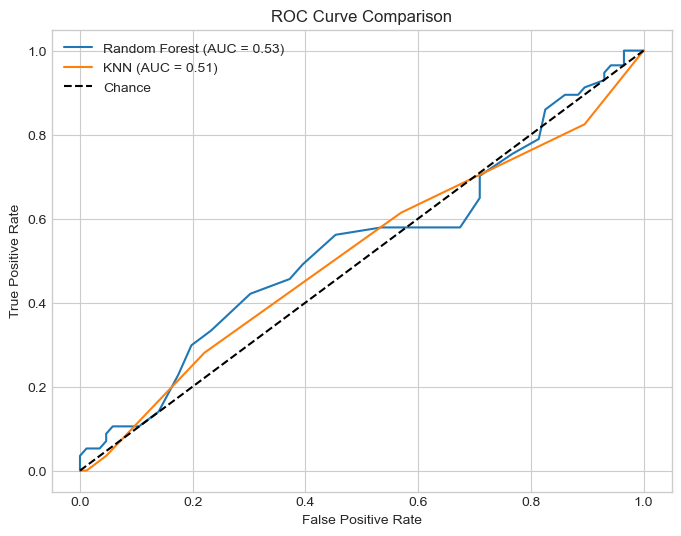

ROC curve generated comparing Random Forest and KNN models.


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

df = pd.read_csv(r"synthetic_breast_cancer.csv")

# Check for target column. If 'diagnosis_encoded' is not present, encode the 'diagnosis' column
if 'diagnosis_encoded' not in df.columns:
    # Ensure there's a 'diagnosis' column
    if 'diagnosis' in df.columns:
        le = LabelEncoder()
        df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
    else:
        raise ValueError('No diagnosis column found to encode. Please check your dataset.')

# Define X and y. We exclude the original diagnosis column if it exists
cols_to_drop = ['diagnosis', 'diagnosis_encoded']
X = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
y = df['diagnosis_encoded']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# -----------------------------
# Random Forest Classifier
# -----------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get predicted probabilities for positive class (assumed to be class 1)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# -----------------------------
# K-Nearest Neighbors Classifier
# -----------------------------
# Scale the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
# Get predicted probabilities for positive class (assumed to be class 1)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# -----------------------------
# Compute ROC Curves and AUC scores
# -----------------------------
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot the ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = ' + str(round(roc_auc_rf, 2)) + ')')
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = ' + str(round(roc_auc_knn, 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

print('ROC curve generated comparing Random Forest and KNN models.')

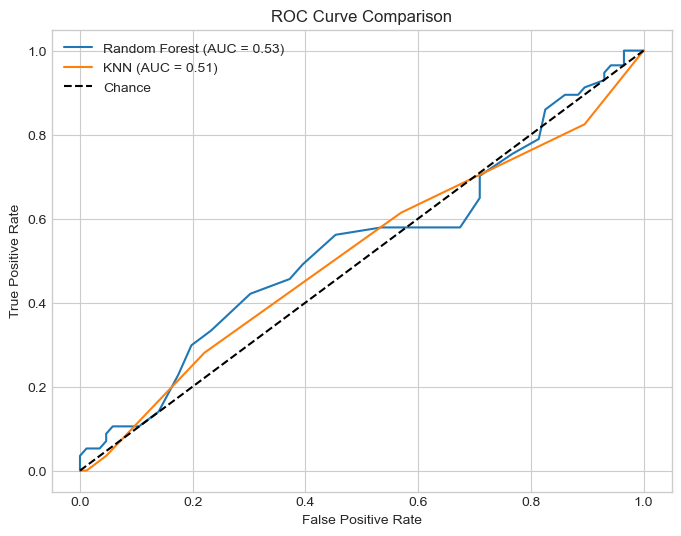

ROC curve generated comparing Random Forest and KNN models.


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

df = pd.read_csv(r"synthetic_breast_cancer.csv")

# Check for target column. If 'diagnosis_encoded' is not present, encode the 'diagnosis' column
if 'diagnosis_encoded' not in df.columns:
    # Ensure there's a 'diagnosis' column
    if 'diagnosis' in df.columns:
        le = LabelEncoder()
        df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
    else:
        raise ValueError('No diagnosis column found to encode. Please check your dataset.')

# Define X and y. We exclude the original diagnosis column if it exists
cols_to_drop = ['diagnosis', 'diagnosis_encoded']
X = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
y = df['diagnosis_encoded']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# -----------------------------
# Random Forest Classifier
# -----------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get predicted probabilities for positive class (assumed to be class 1)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# -----------------------------
# K-Nearest Neighbors Classifier
# -----------------------------
# Scale the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
# Get predicted probabilities for positive class (assumed to be class 1)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# -----------------------------
# Compute ROC Curves and AUC scores
# -----------------------------
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot the ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = ' + str(round(roc_auc_rf, 2)) + ')')
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = ' + str(round(roc_auc_knn, 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

print('ROC curve generated comparing Random Forest and KNN models.')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Use the existing df and ensure correct target encoding
if 'diagnosis_encoded' in df.columns:
    y = df['diagnosis_encoded']
else:
    y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

X = df.drop(columns=[col for col in ['id', 'diagnosis', 'diagnosis_encoded'] if col in df.columns])

# Feature Scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Check if both classes are present in y_train
if len(set(y_train)) < 2:
    raise ValueError("Training set contains only one class. Cannot compute probabilities for both classes.")

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)

# Fit models
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get probability predictions
y_train_prob_knn = knn.predict_proba(X_train)[:, 1]
y_test_prob_knn = knn.predict_proba(X_test)[:, 1]

y_train_prob_rf = rf.predict_proba(X_train)[:, 1]
y_test_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute AUC scores
auc_train_knn = roc_auc_score(y_train, y_train_prob_knn)
auc_test_knn = roc_auc_score(y_test, y_test_prob_knn)

auc_train_rf = roc_auc_score(y_train, y_train_prob_rf)
auc_test_rf = roc_auc_score(y_test, y_test_prob_rf)

# Display results
print("==== AUC Scores ====")
print(f"KNN - Train AUC: {auc_train_knn:.4f}")
print(f"KNN - Test AUC : {auc_test_knn:.4f}")
print(f"RF  - Train AUC: {auc_train_rf:.4f}")
print(f"RF  - Test AUC : {auc_test_rf:.4f}")


==== AUC Scores ====
KNN - Train AUC: 0.7794
KNN - Test AUC : 0.5451
RF  - Train AUC: 1.0000
RF  - Test AUC : 0.5639


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("synthetic_breast_cancer.csv")

# Prepare features (X) and target (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']  # Already 0/1

# Define the KNN pipeline (with scaling)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # KNN classifier
])

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform KNN CV AUC
knn_cv_auc = cross_val_score(knn_pipeline, X, y, cv=5, scoring='roc_auc')
print("KNN CV AUCs:", knn_cv_auc)
print("KNN Mean AUC:", knn_cv_auc.mean())

# Perform Random Forest CV AUC
rf_cv_auc = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("RF CV AUCs:", rf_cv_auc)
print("RF Mean AUC:", rf_cv_auc.mean())

KNN CV AUCs: [0.49565217 0.52657005 0.45877617 0.468438   0.60718954]
KNN Mean AUC: 0.5113251870796628
RF CV AUCs: [0.51336554 0.55861514 0.41497585 0.55587762 0.45637255]
RF Mean AUC: 0.49984133750118404
